# <p align="center">🚢 Titanic Survival Analysis – Data Exploration & Preprocessing 🚢</p>


<p align="center">
  <img src=https://www.cruisehive.com/wp-content/uploads/2023/08/titanic22-889x500.jpg" width="800"/>
</p>


# **My Information**

### ‎‧₊**˚✿[My Name]✿˚** : **[Mohamed Reda Ramadan Khamis]**
### ‎‧₊**˚✿[My Phone Number]✿˚** : **[01554725661]**

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# Drop Unnecessary Coloums
df.drop(["PassengerId","Name","Ticket"],axis =1,inplace = True)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [9]:
# Check for Dtypes
dType = df.dtypes
U_unique = df.nunique()
pd.DataFrame({"Dtypes" : dType,"Unique Values" : U_unique}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtypes,int64,int64,object,float64,int64,int64,float64,object,object
Unique Values,2,3,2,88,7,7,248,147,3


In [10]:
# convert Survived, Pclass, Sex, SibSp,Parch, Cabin,Embarked
cols = ["Survived","Pclass","Sex","SibSp","Parch","Embarked"]
df[cols] = df[cols].astype("category")
pd.DataFrame(df.dtypes).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,category,category,category,float64,category,category,float64,object,category


In [11]:
# Null Values :
null = df.isnull().sum()
ratio = (null / df.shape[0]) * 100
pd.DataFrame({"Sum of Nulls in each coloum" : null,"Ratio" : ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Sum of Nulls in each coloum,0.0,0.0,0.0,177.00000,0.0,0.0,0.0,687.000000,2.000000
Ratio,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,77.104377,0.224467


In [12]:
# insight : number of nulls in Embarked coloum is very small so i will Drop rows that contain null values in Embarked coloum
df = df.dropna(subset = ["Embarked"])

In [13]:
# insight : number of nulls in Cabin coloum is very large(huge) so i will Drop  Cabin coloum
df = df.drop("Cabin", axis = 1)

In [14]:
# insight : number of nulls in Age coloum is large( not huge)
# Age is numerical coloum (Median , Mean)
# Median : non-normal distribution or Outliers (because Median is not sensitive with Outlier)
# Mean : normal distribution or  not contain Outliers (because Mean is sensitive with Outlier)

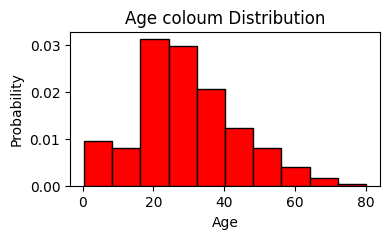

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize = (4,2))
plt.hist(df["Age"], density = True, color= "red", edgecolor = "black")
plt.title("Age coloum Distribution")
plt.xlabel("Age")
plt.ylabel("Probability")
plt.show()

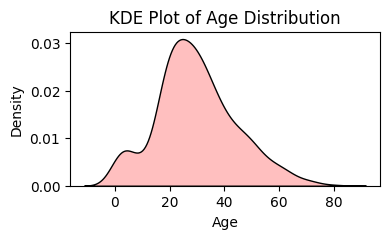

In [16]:
import seaborn as sns
plt.figure(figsize = (4,2))
sns.kdeplot(df["Age"], fill=True, color='red', edgecolor= "black")
plt.title('KDE Plot of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [17]:
median = df["Age"].median()
df["Age"].fillna(median, inplace = True)

/tmp/ipython-input-2479223274.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(median, inplace = True)


In [18]:
sum_nulls = df.isnull().sum()
pd.DataFrame({"Sum of Nulls in each coloum" : sum_nulls}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Sum of Nulls in each coloum,0,0,0,0,0,0,0,0


In [19]:
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [20]:
# Handle Outliers
pd.DataFrame(df.dtypes).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,category,category,category,float64,category,category,float64,category


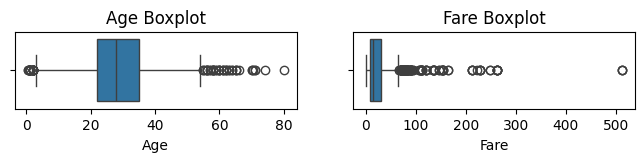

In [21]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(8,1))
for i , col in enumerate(num_cols):
  plt.subplot(1,len(num_cols),i+1)
  sns.boxplot(df[col],orient = "h")
  plt.title(f"{col} Boxplot")

In [22]:
# Replace Outliers:
for col in num_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  lower_outliers = df[df[col] < lower_bound][col].values
  upper_outliers = df[df[col] > upper_bound][col].values
  df[col].replace(lower_outliers, lower_bound, inplace = True)
  df[col].replace(upper_outliers, upper_bound, inplace = True)

/tmp/ipython-input-2716392393.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(lower_outliers, lower_bound, inplace = True)
/tmp/ipython-input-2716392393.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

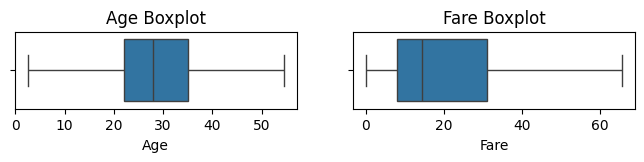

In [23]:
plt.figure(figsize=(8,1))
for i , col in enumerate(num_cols):
  plt.subplot(1,len(num_cols),i+1)
  sns.boxplot(df[col],orient = "h")
  plt.title(f"{col} Boxplot")

<function matplotlib.pyplot.show(close=None, block=None)>

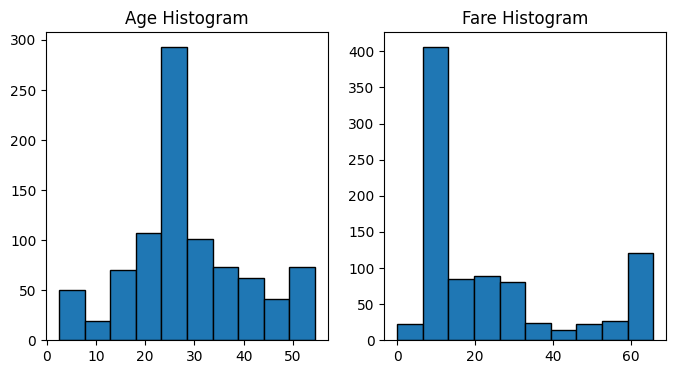

In [24]:
# Visualization
# 1) Data distribution graphs
# Numerical cols
num_cols = df.select_dtypes("number").columns
plt.figure(figsize = (8,4))
for i,col in enumerate(num_cols):
  plt.subplot(1,2,i+1)
  plt.hist(df[col],edgecolor = "black")
  plt.title(f"{col} Histogram")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

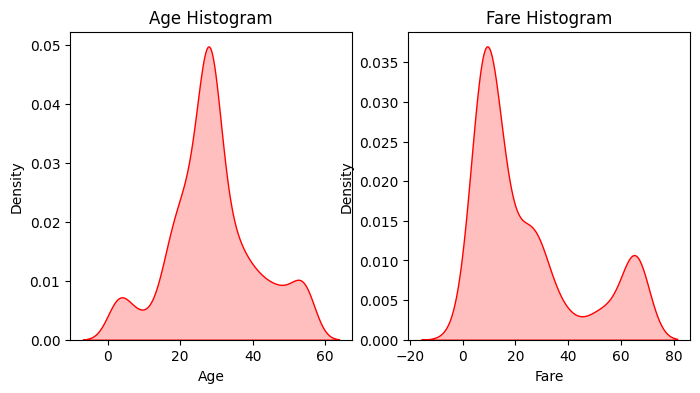

In [25]:
plt.figure(figsize = (8,4))
for i,col in enumerate(num_cols):
  plt.subplot(1,len(num_cols),i+1)
  sns.kdeplot(df[col],fill = True , color = "red")
  plt.title(f"{col} Histogram")
plt.show

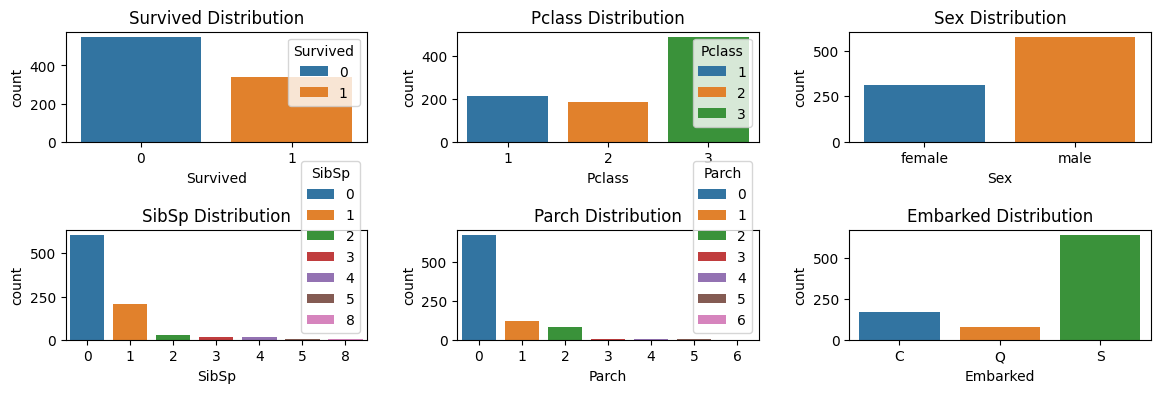

In [26]:
cat_coloums = df.select_dtypes("category").columns
plt.figure(figsize=(14,4))
for i , cols in enumerate (cat_coloums):
  plt.subplot(2,3,i+1)
  sns.countplot(x=cols ,hue= cols, data = df , palette= "tab10")
  plt.title(f"{cols} Distribution")
plt.subplots_adjust(hspace = 0.8 , wspace = 0.3)
plt.show()

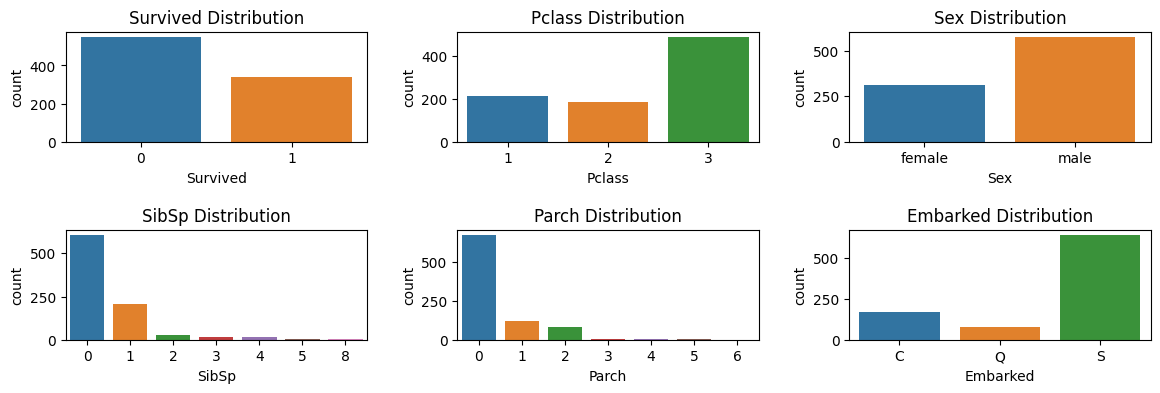

In [27]:
cat_coloums = df.select_dtypes("category").columns
plt.figure(figsize=(14,4))
for i , cols in enumerate (cat_coloums):
  plt.subplot(2,3,i+1)
  sns.countplot(x=cols ,hue= cols, data = df , palette= "tab10")
  plt.legend([],[],frameon = False)
  plt.title(f"{cols} Distribution")
plt.subplots_adjust(hspace = 0.8 , wspace = 0.3)
plt.show()

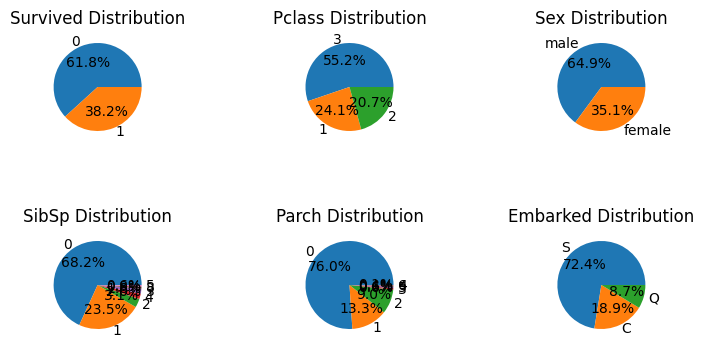

In [28]:
plt.figure(figsize=(9,4))
for i , cols in enumerate (cat_coloums):
  plt.subplot(2,3,i+1)
  unique = df[cols].value_counts()
  count = unique.values
  categories = unique.index
  plt.pie(count,labels = categories,autopct = "%1.1f%%")
  plt.title(f"{cols} Distribution")
plt.subplots_adjust(hspace = 0.8 , wspace = 0.3)
plt.show()

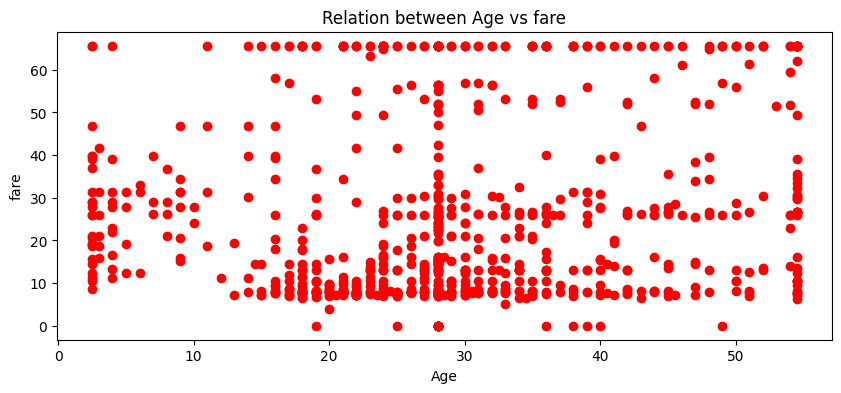

In [29]:
# 2)Realationship Graphs
# Numerical column with numerical column --> scatter plot
plt.figure(figsize=(10,4))
plt.scatter(df["Age"],df["Fare"],color = "red")
plt.xlabel("Age")
plt.ylabel ("fare")
plt.title("Relation between Age vs fare")
plt.show()

<Figure size 1000x400 with 0 Axes>

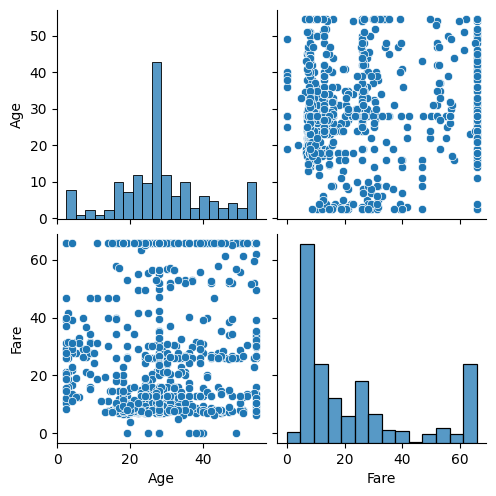

In [30]:
# 2)Realationship Graphs
# Numerical column with numerical column --> pair plot
plt.figure(figsize=(10,4))
sns.pairplot(df)
plt.xlabel("Age")
plt.ylabel ("fare")
plt.show()

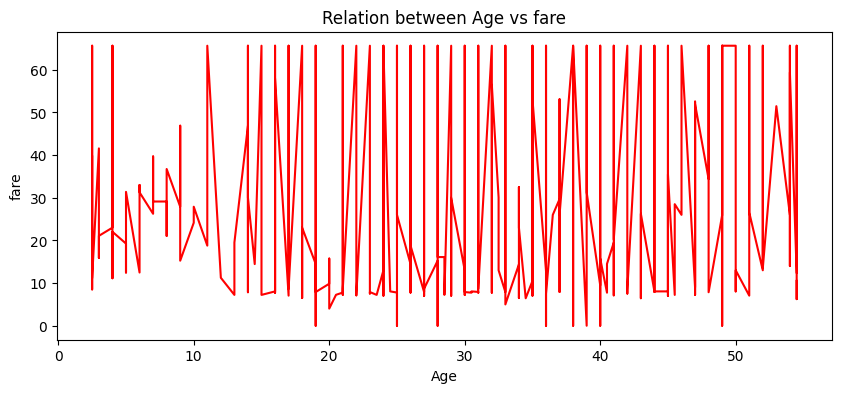

In [31]:
# Numerical column with numerical column --> line plot
sorted_df = df.sort_values(by = "Age")
plt.figure(figsize=(10,4))
plt.plot(sorted_df["Age"],sorted_df["Fare"],color = "red")
plt.xlabel("Age")
plt.ylabel ("fare")
plt.title("Relation between Age vs fare")
plt.show()

In [32]:
# Numerical column with numerical column -->  heatmap
corr = df.select_dtypes(include=['number']).corr()
print(corr)

           Age      Fare
Age   1.000000  0.139065
Fare  0.139065  1.000000


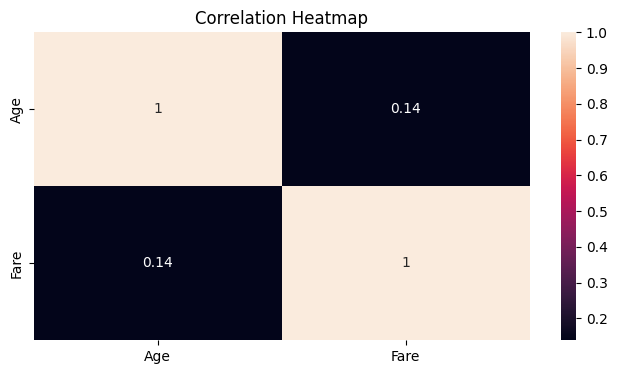

In [33]:
plt.figure(figsize=(8,4))
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()


In [34]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

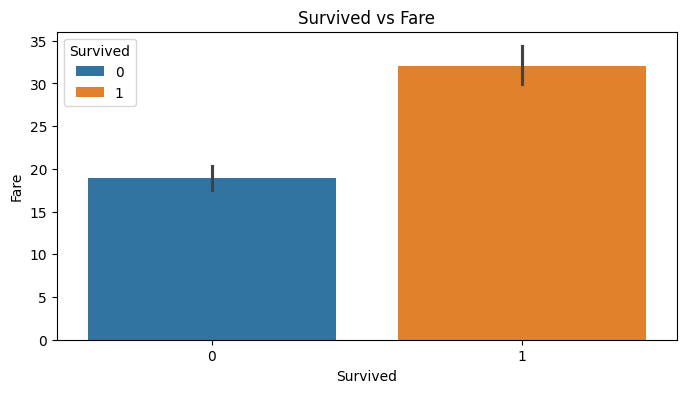

In [35]:
# Numerical column with categorical column -->  barplot
plt.figure(figsize=(8,4))
sns.barplot(x="Survived", y="Fare", data=df, hue="Survived", palette="tab10")
plt.title("Survived vs Fare")
plt.show()


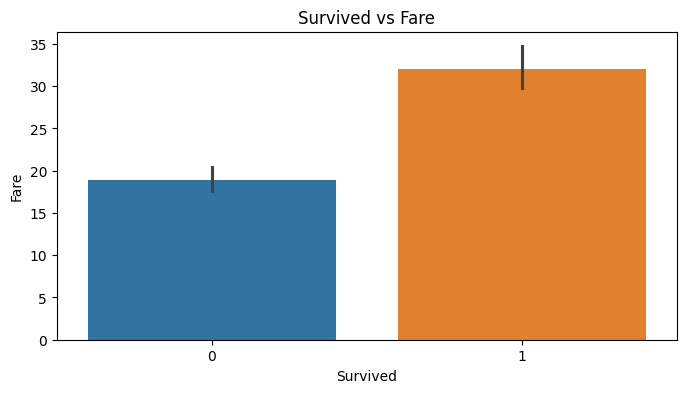

In [36]:
plt.figure(figsize=(8,4))
sns.barplot(x="Survived", y="Fare", data=df, hue="Survived", palette="tab10")
plt.legend([],[],frameon= False)
plt.title("Survived vs Fare")
plt.show()


/tmp/ipython-input-244860822.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  agg = df.pivot_table(index = "Survived", columns = "Sex", values ="Age" ,aggfunc= len)


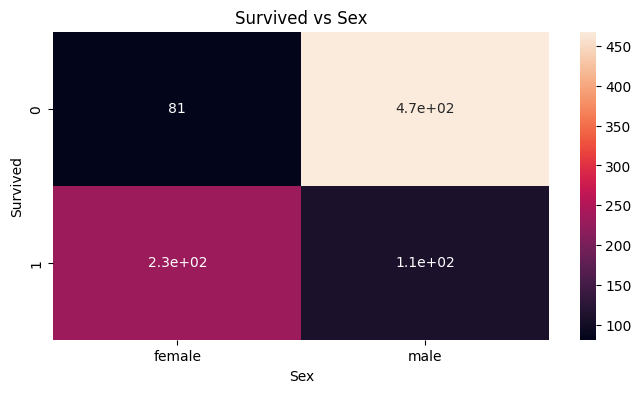

In [37]:
# categorical column with categorical column -->  heatmap
# columns : ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']
plt.figure(figsize=(8,4))
agg = df.pivot_table(index = "Survived", columns = "Sex", values ="Age" ,aggfunc= len)
sns.heatmap(agg, annot=True)
plt.title('Survived vs Sex')
plt.show()


In [38]:
df.duplicated().sum()

np.int64(129)

In [39]:
df.drop_duplicates(inplace = True)

In [40]:
df.duplicated().sum()

np.int64(0)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 760 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  760 non-null    category
 1   Pclass    760 non-null    category
 2   Sex       760 non-null    category
 3   Age       760 non-null    float64 
 4   SibSp     760 non-null    category
 5   Parch     760 non-null    category
 6   Fare      760 non-null    float64 
 7   Embarked  760 non-null    category
dtypes: category(6), float64(2)
memory usage: 23.5 KB


In [42]:
# Data Splitting
x = df.drop("Survived", axis = 1)
y = df[["Survived"]]


In [43]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,65.6563,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,Q
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [44]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
885,0
887,1
888,0
889,1


In [45]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
num_cols = x.select_dtypes("number").columns
scaler = MinMaxScaler()
scaler.fit(x[num_cols])
x[num_cols] = scaler.transform(x[num_cols])

In [46]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,0.375000,1,0,0.110424,S
1,1,female,0.682692,1,0,1.000000,C
2,3,female,0.451923,0,0,0.120704,S
3,1,female,0.625000,1,0,0.808757,S
4,3,male,0.625000,0,0,0.122608,S
...,...,...,...,...,...,...,...
885,3,female,0.701923,0,5,0.443598,Q
887,1,female,0.317308,0,0,0.456925,S
888,3,female,0.490385,1,2,0.357163,S
889,1,male,0.451923,0,0,0.456925,C


In [49]:
# Encoding
!pip install category-encoders
from category_encoders import OneHotEncoder
cat_cols = x.select_dtypes("category").columns
encoder = OneHotEncoder(cols = cat_cols,drop_invariant= True)
x = encoder.fit_transform(x)

In [50]:
x

,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,Age,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_7,Fare,Embarked_1,Embarked_2,Embarked_3
0,1,0,0,1,0,0.375000,1,0,0,0,...,0,0,0,0,0,0,0.110424,1,0,0
1,0,1,0,0,1,0.682692,1,0,0,0,...,0,0,0,0,0,0,1.000000,0,1,0
2,1,0,0,0,1,0.451923,0,1,0,0,...,0,0,0,0,0,0,0.120704,1,0,0
3,0,1,0,0,1,0.625000,1,0,0,0,...,0,0,0,0,0,0,0.808757,1,0,0
4,1,0,0,1,0,0.625000,0,1,0,0,...,0,0,0,0,0,0,0.122608,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,1,0,0,0,1,0.701923,0,1,0,0,...,0,0,1,0,0,0,0.443598,0,0,1
887,0,1,0,0,1,0.317308,0,1,0,0,...,0,0,0,0,0,0,0.456925,1,0,0
888,1,0,0,0,1,0.490385,1,0,0,0,...,0,1,0,0,0,0,0.357163,1,0,0
889,0,1,0,1,0,0.451923,0,1,0,0,...,0,0,0,0,0,0,0.456925,0,1,0


In [51]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
885,0
887,1
888,0
889,1
